In [1]:
import pandas as pd
data= pd.read_csv(
    "winequalityN.csv",
    names=["type","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])

threshold = 6  # Define your threshold

data['quality'] = (data['quality'] > threshold).astype(int)
data['type'] = data['type'].apply(lambda x: 0 if x=='white' else 1)
counts = data['quality'].value_counts()
target_count = min(counts)
balanced_data = pd.concat([
    data[data['quality'] == 0].sample(target_count, replace=True),
    data[data['quality'] == 1].sample(target_count, replace=True)
])
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data['quality'].value_counts()
data = balanced_data
features = data.copy()
features.fillna(0, inplace=True)
labels = features.pop('quality')
import numpy as np
features = np.array(features)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.05, random_state=0)
from sklearn.svm import SVC

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [4]:
clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [5]:
predictions = clf.predict(X_test)
predictions_train = clf.predict(X_train)

In [6]:
import sklearn
sklearn.metrics.roc_curve(y_test,predictions)

(array([0.        , 0.19402985, 1.        ]),
 array([0.        , 0.80327869, 1.        ]),
 array([inf,  1.,  0.]))

In [7]:
sklearn.metrics.roc_auc_score(y_test,predictions)

0.8046244188891608

In [8]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[54, 13],
       [12, 49]], dtype=int64)

In [9]:
sklearn.metrics.log_loss(y_test,predictions)

7.039776052561944

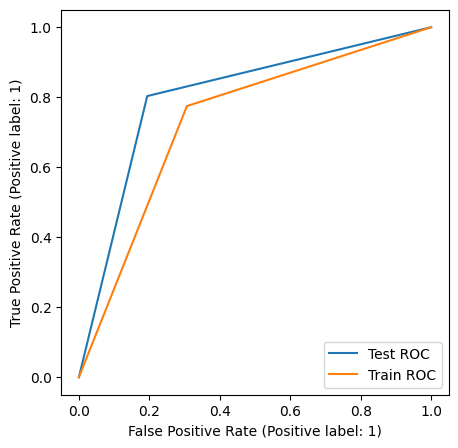

In [10]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_predictions(y_test,predictions, ax=ax, label='Test ROC')
RocCurveDisplay.from_predictions(y_train,predictions_train, ax=ax, label='Train ROC')

In [11]:

sklearn.metrics.f1_score(y_test,predictions,average=None)

array([0.81203008, 0.79674797])

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8046875
